In [1]:
import pandas as pd
from openpyxl import load_workbook
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('/kaggle/input/eb-tariff/OPR CC Details New.xlsx')

In [3]:
wb = load_workbook('/kaggle/input/eb-tariff/OPR CC Details New.xlsx')
sheet = wb.active

In [4]:
merged_ranges_copy = sheet.merged_cells.ranges.copy()

for merged_range in merged_ranges_copy:
    merged_value = sheet.cell(merged_range.min_row, merged_range.min_col).value
    if merged_value is not None:
        # Convert values to integers before unmerging
        start_row, start_col, end_row, end_col = (
            merged_range.min_row, merged_range.min_col,
            merged_range.max_row, merged_range.max_col
        )
        sheet.unmerge_cells(start_row=start_row, start_column=start_col, end_row=end_row, end_column=end_col)

        for row in sheet.iter_rows(min_row=start_row, max_row=end_row,
                                   min_col=start_col, max_col=end_col):
            for cell in row:
                cell.value = merged_value

In [5]:
output_excel_file_path = '/kaggle/working/opr_final.xlsx'
wb.save(output_excel_file_path)

In [6]:
# Read the modified Excel file into a Pandas DataFrame
df = pd.read_excel('/kaggle/working/opr_final.xlsx', header=1)

In [7]:
df.head(4)

,SLNO.,SC number,Tariff,CC Ref number,CC ISSUSED BY (DTCP/Corpn etc
0,1.0,041-003-3052,LM51,015/2023,Coimbatore Corporation
1,2.0,042-004-3393,LA1A,1479/Dt20.4.22,Presidant Pattanam Village Panchayat
2,3.0,042-004-560,LA1A,1479/Dt20.4.22,Presidant Pattanam Village Panchayat
3,4.0,042-004-3590,LA1A,1479/Dt20.4.22,Presidant Pattanam Village Panchayat


In [10]:
df.isna().sum()

SLNO.                            0
SC number                        0
Tariff                           1
CC Ref number                    9
CC ISSUSED BY (DTCP/Corpn etc    6
dtype: int64

In [9]:
df = df.dropna(subset=['SC number'])


In [32]:
df['CC ISSUSED BY (DTCP/Corpn etc'] = df['CC ISSUSED BY (DTCP/Corpn etc'].fillna(method='ffill')


In [ ]:
grouped_df = df.groupby('CC ISSUSED BY (DTCP/Corpn etc')

In [43]:
df['CC ISSUSED BY (DTCP/Corpn etc'].nunique()

38

In [54]:
df['Tariff'].unique()

array(['LM51', 'LA1A', 'IA', 'ID', 'V', 'v', '1A'], dtype=object)

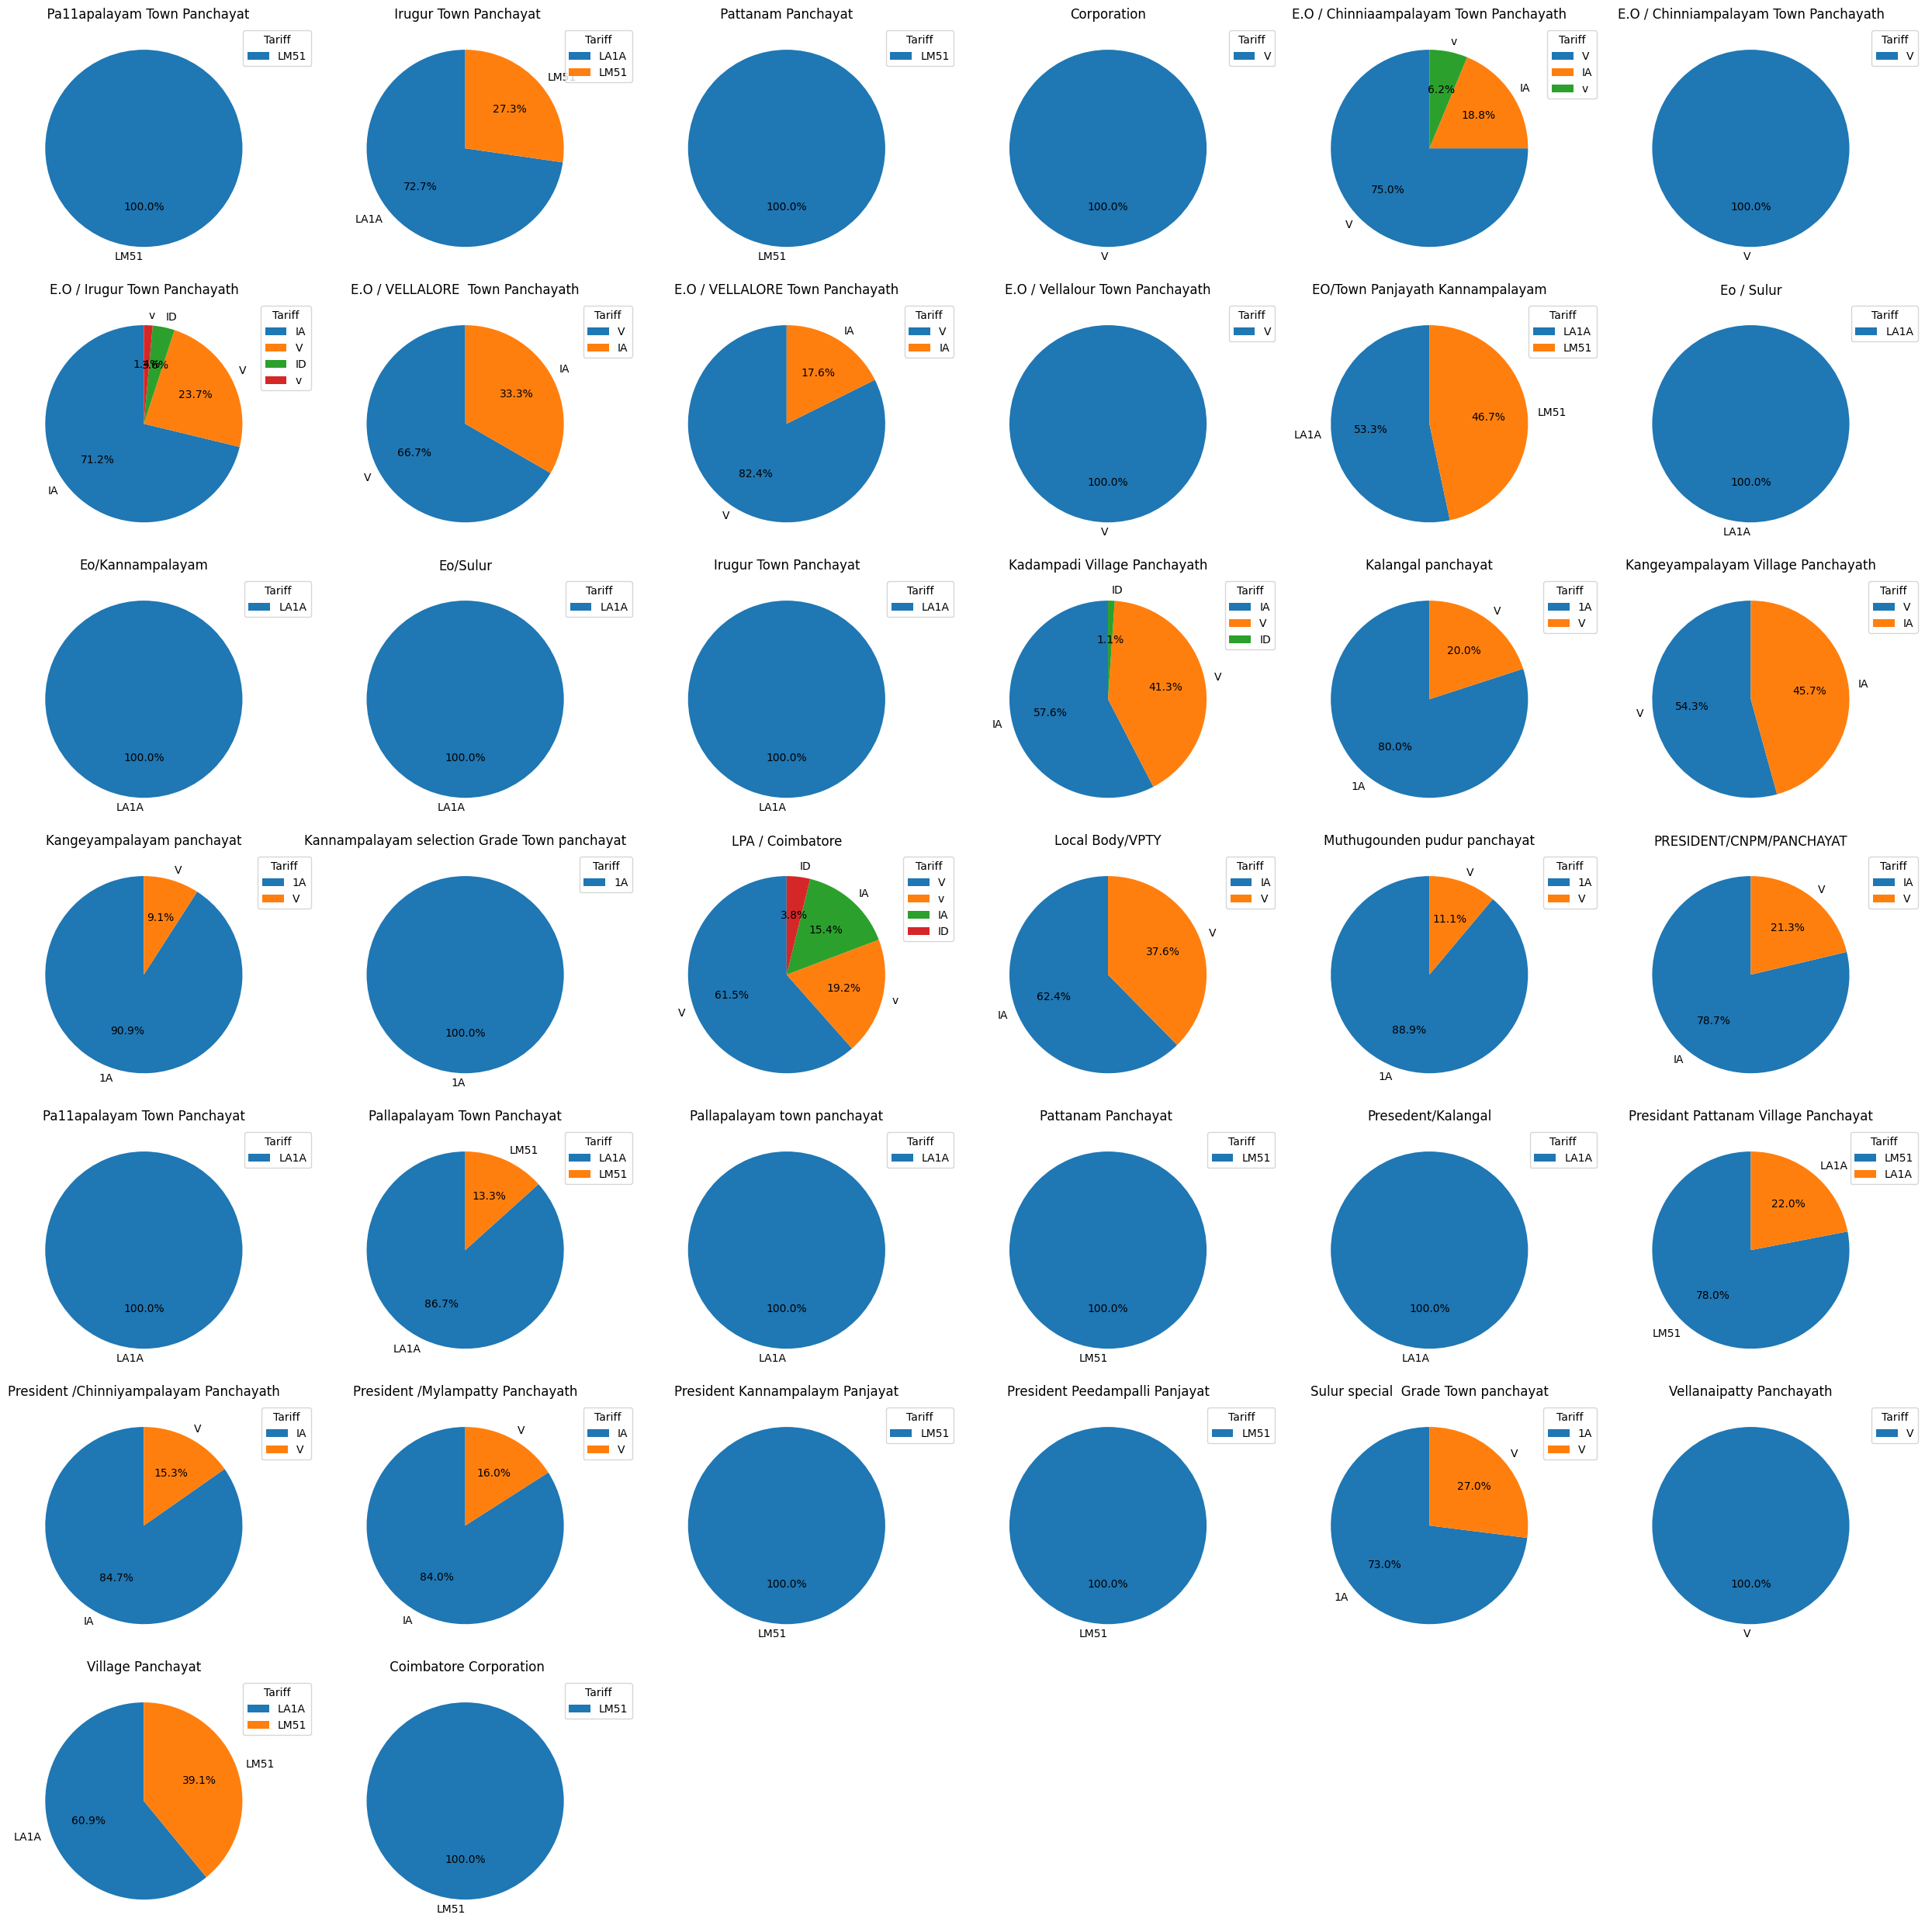

In [72]:
fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(25, 25))

# Flatten the 6x6 grid into a 1D array for easy iteration
axes = axes.flatten()

# Plot pie charts for each group based on the 'Category' column
for i, (name, group) in enumerate(grouped_df):
    value_counts = group['Tariff'].value_counts()
    
    # Use the current subplot from the flattened array
    ax = axes[i]
    
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(name)
    ax.legend(value_counts.index, title='Tariff', loc='upper right', bbox_to_anchor=(1.2, 1))

# Hide any remaining empty subplots in the grid
for ax in axes[len(grouped_df):]:
    ax.axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the figure to a file
plt.savefig('ondipudur_pie.png', bbox_inches='tight')

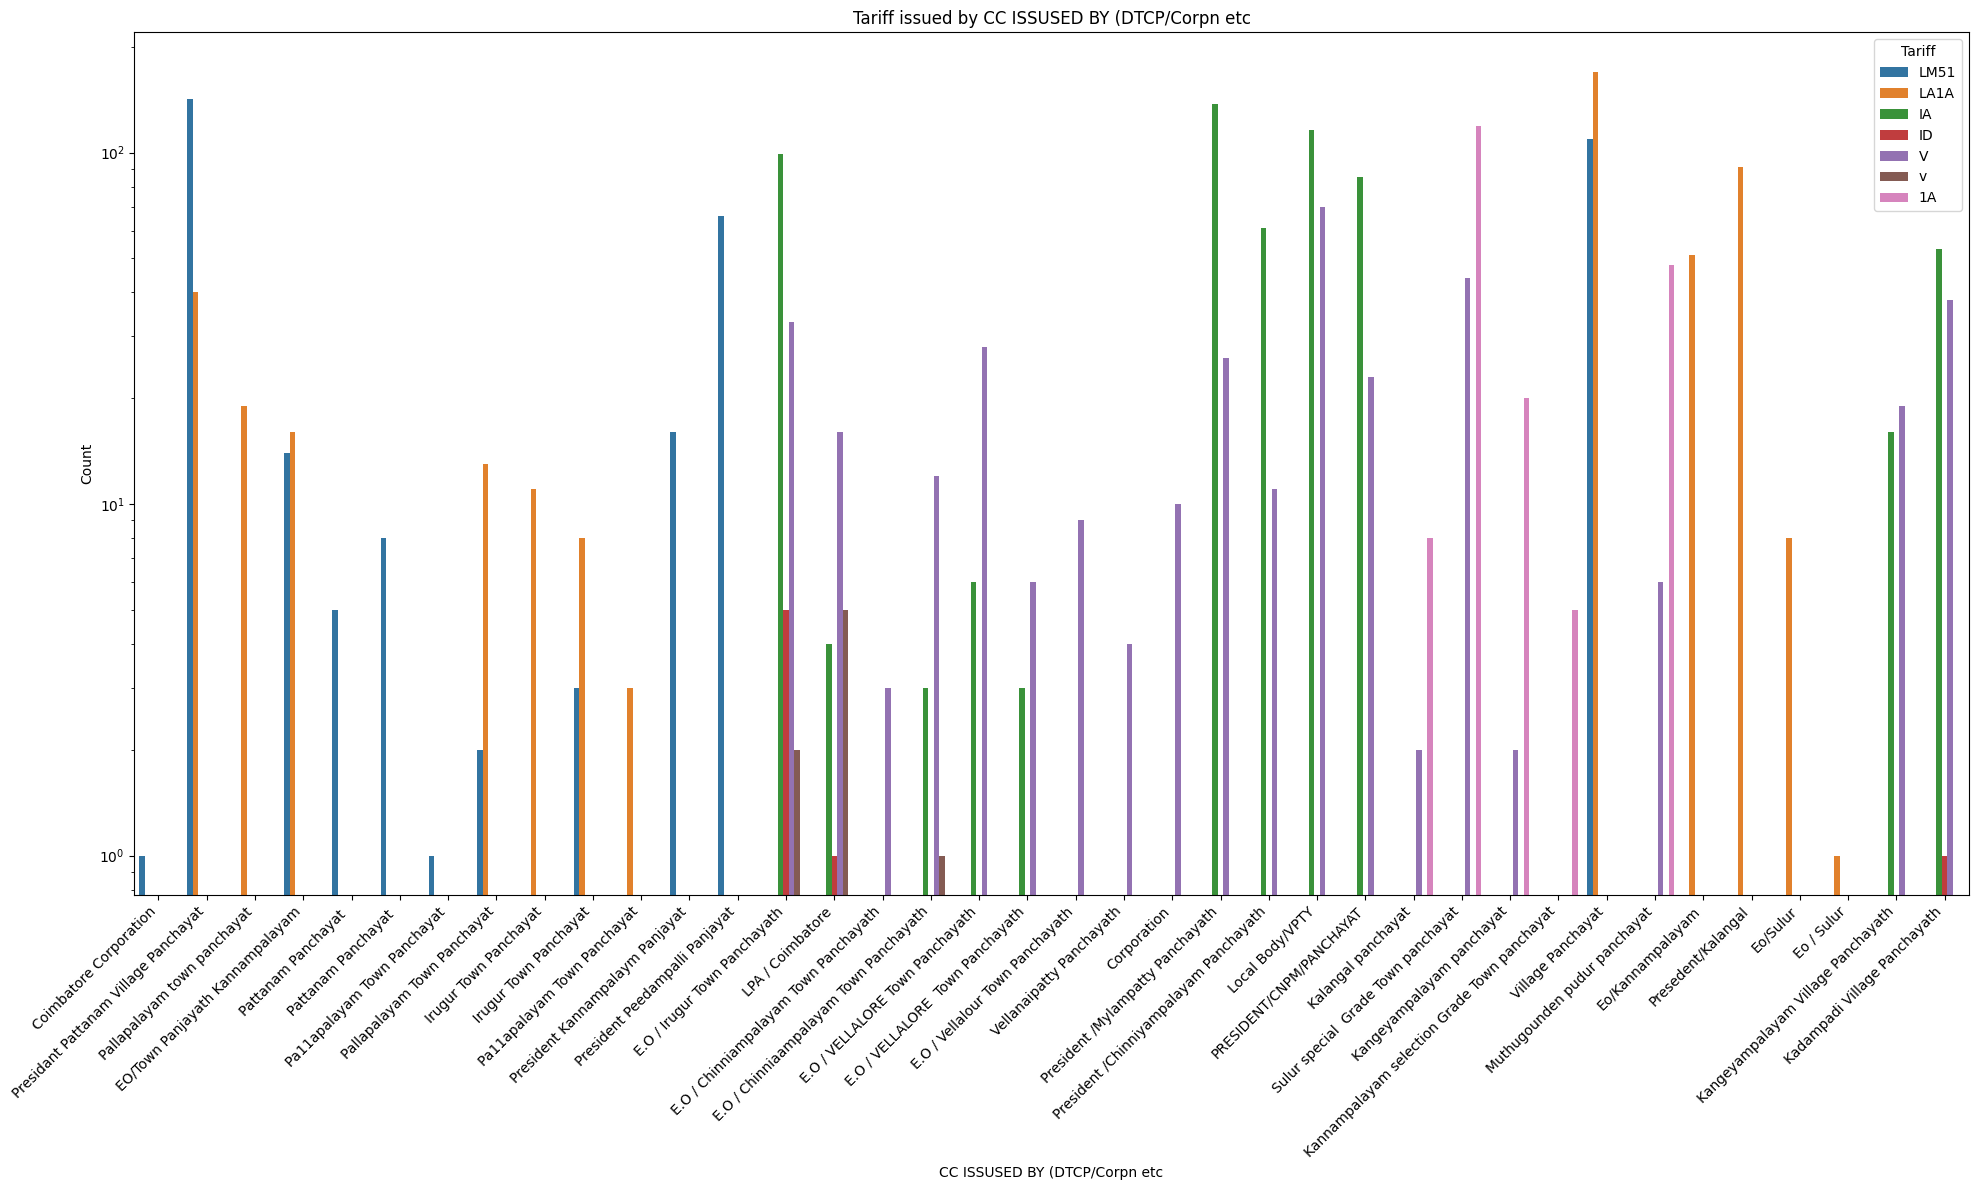

In [96]:


column_name = 'Tariff'
row = 'CC ISSUSED BY (DTCP/Corpn etc'

# Create countplot
plt.figure(figsize=(20, 12))
sns.countplot(x=row, hue=column_name, data=df)
plt.xticks(rotation=45, ha='right')

# for label in ax.xaxis.get_ticklabels()[::10]:
#     label.set_visible(False)


# Set labels and title
plt.xlabel(row)
plt.ylabel('Count')
plt.yscale('log')
plt.title(f'Tariff issued by {row}')
plt.tight_layout()
plt.savefig('ondipudur_tariff_countplot_log.png')

plt.show()

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1958 entries, 0 to 1958
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SLNO.                          1958 non-null   float64
 1   SC number                      1958 non-null   object 
 2   Tariff                         1958 non-null   object 
 3   CC Ref number                  1949 non-null   object 
 4   CC ISSUSED BY (DTCP/Corpn etc  1958 non-null   object 
dtypes: float64(1), object(4)
memory usage: 156.3+ KB


In [11]:
df.to_csv('ondipudur.csv', index=False)
